# WPLI Connectivity Networks

In [62]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [63]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
sys.path.append("../../../lfp/")
import connectivity

In [64]:
%matplotlib inline

In [65]:
phase = "P1"
session = "LC2"
spectra_name = "thetaComplex"
method = "wpli"

In [66]:
load_connectivity = connectivity.load_connectivity


In [67]:
dataset = load_connectivity(phase, session, spectra_name=spectra_name, method="wpli", extra_args="", rat_nums=None, rats_only=False)

In [68]:
dataset.shape

(13, 417, 36, 7, 7)

In [69]:
dataset.run_key

<xarray.DataArray 'run_key' (run_key: 13)>
array(['Rtbsi11_18', 'Rtbsi12_13', 'Rtbsi15_25', 'Rtbsi16_25', 'Rtbsi22_12',
       'Rtbsi25_22', 'Rtbsi26_18', 'Rtbsi28_24', 'Rtbsi31_13', 'Rtbsi32_15',
       'Rtbsi34_15', 'Rtbsi35_16', 'Rtbsi38_20'], dtype='<U10')
Coordinates:
  * run_key  (run_key) <U10 'Rtbsi11_18' 'Rtbsi12_13' ... 'Rtbsi38_20'

In [70]:
# Plotting a connectivity frequency / WPLI matrix
run_key = "Rtbsi25_22"
struct1 = "BO"
connectivity_data = dataset.sel(run_key=run_key, Struct1=struct1)
struct2 = connectivity_data.Struct2
connectivity_data

<xarray.DataArray (Time: 417, Freq: 36, Struct2: 7)>
dask.array<getitem, shape=(417, 36, 7), dtype=float32, chunksize=(417, 36, 7), chunktype=numpy.ndarray>
Coordinates:
  * Time     (Time) float64 -2.0 -1.988 -1.976 -1.964 ... 2.964 2.976 2.988 3.0
  * Freq     (Freq) float64 2.0 2.5 3.0 3.5 4.0 4.5 ... 17.5 18.0 18.5 19.0 19.5
    Struct1  <U2 'BO'
  * Struct2  (Struct2) object 'BO' 'Cerv' 'Hipp' 'PA' 'PP' 'Stri' 'TO'
    run_key  <U10 'Rtbsi25_22'

<xarray.DataArray (Time: 417, Freq: 36)>
dask.array<getitem, shape=(417, 36), dtype=float32, chunksize=(417, 36), chunktype=numpy.ndarray>
Coordinates:
  * Time     (Time) float64 -2.0 -1.988 -1.976 -1.964 ... 2.964 2.976 2.988 3.0
  * Freq     (Freq) float64 2.0 2.5 3.0 3.5 4.0 4.5 ... 17.5 18.0 18.5 19.0 19.5
    Struct1  <U2 'BO'
    Struct2  <U2 'TO'
    run_key  <U10 'Rtbsi25_22'

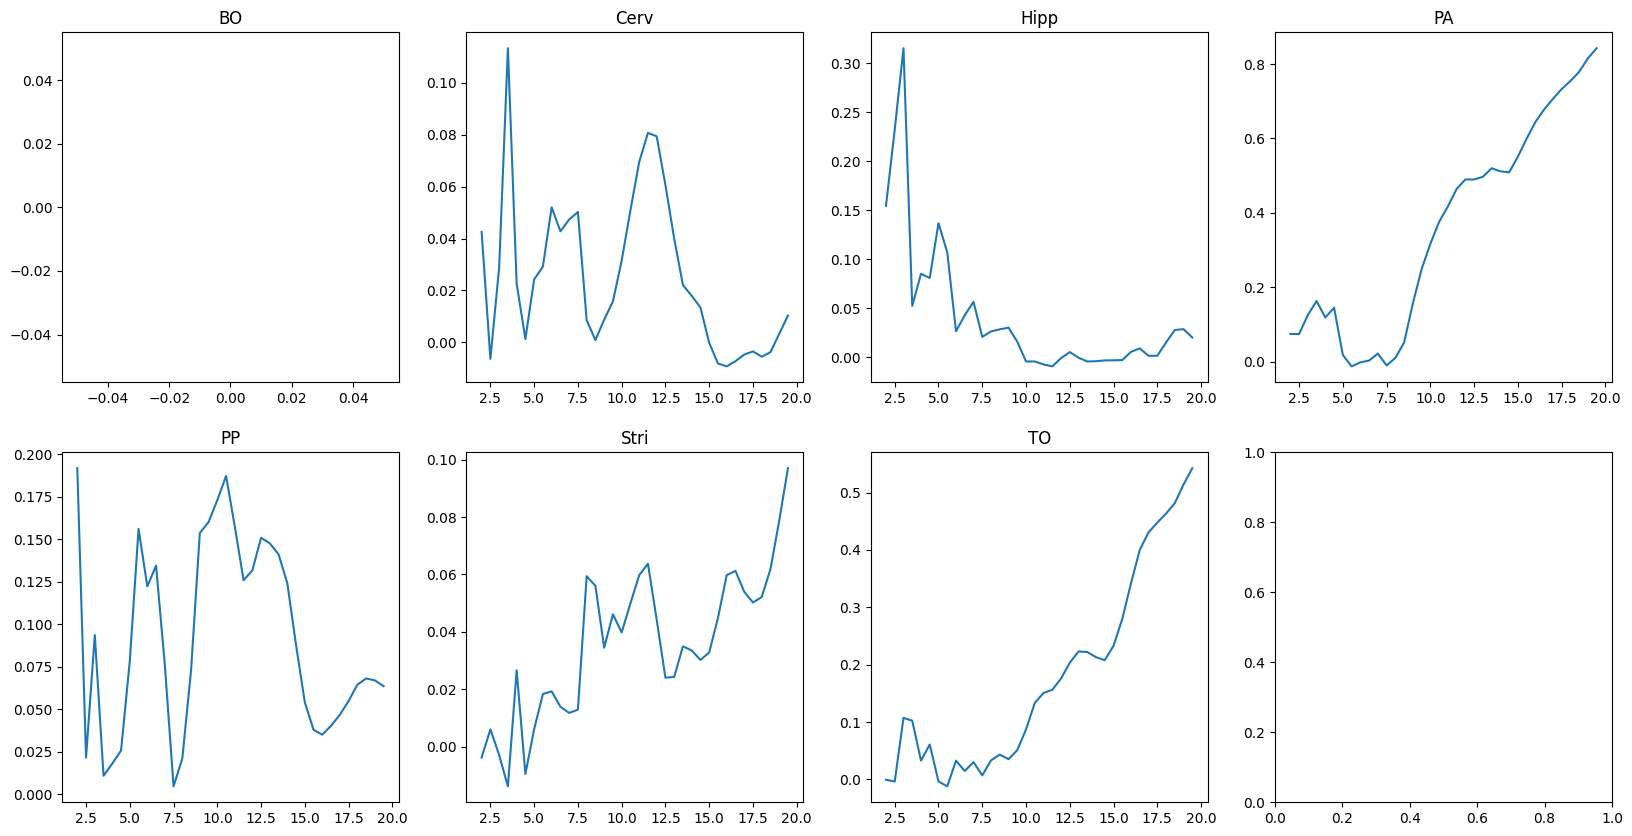

In [71]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
i = 0
for struct in struct2:
    Struct2 = struct.values
    wpli_data = connectivity_data.sel(Struct2=Struct2)
    axs[i//4, i%4].plot(wpli_data.Freq, wpli_data.mean(dim="Time"))
    axs[i//4, i%4].set_title(Struct2)
    i += 1
wpli_data

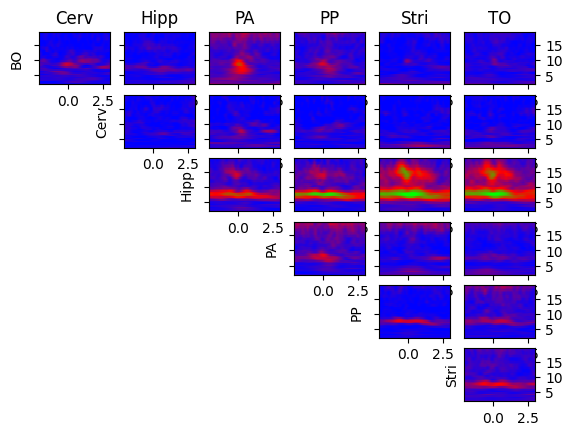

In [74]:
connectivity.plot_connectivity_map(dataset)

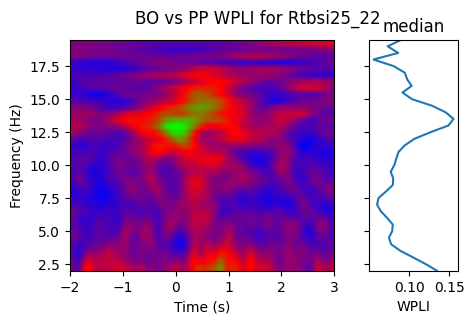

In [73]:
# Plotting a connectivity map for BO vs Stri,
# and plot the frequency / mean WPLI on left side of the plot, 
# rotated 90 degrees clockwise
z1 = "BO"
z2 = "PP"
conn = dataset
fig = plt.figure(figsize=(5, 3))
extent = tuple(conn.Time[[0, -1]].values) + tuple(conn.Freq[[0, -1]].values)
axs = fig.subplots(1, 2, width_ratios=[3, 1], sharey=True)
avg_map = conn.sel(Struct1=z1, Struct2=z2).T.mean('run_key')
Time = avg_map.Time
Freq = avg_map.Freq
axs[0].imshow(avg_map, cmap='brg', extent=extent, aspect='auto')
medianWPLI = avg_map.mean(dim="Time")
axs[1].plot(medianWPLI, Freq[-1] - Freq + Freq[0])
axs[1].set_title("median")
axs[0].set_ylabel("Frequency (Hz)")
axs[0].set_xlabel("Time (s)")
axs[1].set_xlabel("WPLI")
plt.suptitle(f"{z1} vs {z2} WPLI for {run_key}")
plt.show()